# 網路爬蟲馬拉松-期末專題

![jupyter](http://cumatrixfile.cupoy.com/0000017714F8D3F6000000266375706F795F70726572656C656173654349/marathon/1611820870027)

## 專題目標:期末主題 1 - Cupoy

任選 Cupoy 新聞服務之某一種分類 (如熱門新聞、科技、商業....)，使用你學習過的爬蟲程式，爬取前 500 篇的文章

### 基礎實作:

![jupyter](https://pycrawler-fileentity.cupoy.com/marathon/dailytask/1586233886850/1597316163487)

### 進階實作:

![jupyter](https://pycrawler-fileentity.cupoy.com/marathon/dailytask/1586233886850/1597316192739)

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

遇到chromedriver版本相容問題:

selenium报错Message: This version of ChromeDriver only supports Chrome version xx:
https://blog.csdn.net/qq_41605934/article/details/116330227

http://npm.taobao.org/mirrors/chromedriver/


## 爬取文章

In [5]:
N = 500  # 設定要爬取文章數

In [6]:
# 打開瀏覽器, 進入欲爬取網頁
browser = webdriver.Chrome(executable_path='../chromedriver')
browser.get("https://www.cupoy.com/newsfeed/topicgrp/tech_tw")

In [7]:
start_time=time.time()

# 每隔兩秒鐘自動往下滑, 擷取 500 篇新聞的 url
count = 0
articles_info = []

print('目前文章數: ', end='')

while count<N:
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html5lib')
    target = soup.find_all('a', class_='sc-jxGEyO')           
    
    dummy = 0    #重複、需扣掉的文章數量                     
    
    for d in target:
        article = {}
        article['title']= d['title']
        article['url'] = d['href']
        article['origin'] = '/'.join(d['href'].split('/', 3)[:-1])  # 新聞來源的網站主頁
        
        if article not in articles_info:                  # 如果有因為往下滑的時間延遲造成爬取到重複的新聞
            articles_info.append(article)               
        else:
            dummy += 1   #重複、需扣掉的文章數量
    
    count = count + len(target) - dummy  #修正後的文章數量
    
    print(count, end=' ')
    
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)

browser.quit()

if len(articles_info) > N:    # 取前 500 筆
    articles_info = articles_info[:N]
    
    
end_time = time.time()
print('take time:', end_time-start_time, 's')

目前文章數: 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 29 40 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 59 59 59 59 72 86 87 99 114 126 141 147 159 174 186 201 213 229 242 258 271 287 300 316 329 346 359 375 385 401 412 424 439 451 466 472 484 498 501 take time: 956.4498989582062 s


In [8]:
for i, a in enumerate(articles_info, start=1):    # 確認 500 筆新聞的標題
    print(i, ' ', a['title'])

1   想開咖啡廳，不是只要沖咖啡而已！專家曝8大開店地雷，經營美店絕對比你想的還要累-風傳媒
2   指揮中心公佈配戴口罩放寬規定，爬山、海邊活動可不用戴口罩 | T客邦
3   中國東北限電限到只有 2G 訊號，紅綠燈罷工、行動支付不能用連買飯都困難 | T客邦
4   NETSCOUT威脅情報報告：DDoS攻擊達540萬次較去年同期增11% | T客邦
5   休旅車華麗變身「音樂戰車」，紐約街頭「惡名昭彰」的多明尼加汽車音響文化 - The News Lens 關鍵評論網
6   如何在手機上壓縮影片檔案？ | T客邦
7   相關道路車輛系統網路安全的最新 ISO 21434 - Soft & Share 線上課程資訊分享
8   【中信兄弟象 vs 味全龍】中華職棒直播、10/3 免費直播線上看、兄弟象Twitch直播-2021 - 蘋果仁 - 果仁 iPhone/iOS/好物推薦科技媒體
9   【味全龍 vs 中信兄弟象】中華職棒直播 LINE Today 線上看、10/3 CPBL下半季線上轉播-2021 - 蘋果仁 - 果仁 iPhone/iOS/好物推薦科技媒體
10   【富邦悍將 vs 統一獅】中華職棒直播、LINE Today Live 直播線上看、10/3 CPBL下半季線上轉播-202 - 蘋果仁 - 果仁 iPhone/iOS/好物推薦科技媒體
11   Apple Watch Series 7 據傳最快下週可預訂，10 月中旬出貨 - 蘋果仁 - 果仁 iPhone/iOS/好物推薦科技媒體
12   pycaret：一個開源、少量程式碼(low-code)的 Python 機器學習庫 - Soft & Share 線上課程資訊分享
13   [免費教學影片]- 使用 PyCaret 在 12 行程式碼中建立一個機器學習分類模型 - Soft & Share 線上課程資訊分享
14   特斯拉 2021 第二季安全報告：自動輔助駕駛更穩定，事故更少 - 蘋果仁 - 果仁 iPhone/iOS/好物推薦科技媒體
15   火幣正式公告中國「12月清退行程表」 : 月中終止入金、幣幣交易，10/31禁人民幣 | 動區動趨-最具影響力的區塊鏈媒體 (比特幣, 加密貨幣)
16   Cardano 資方砸 1 億美元發展「DeFi、NFT

In [11]:
# 轉成 dataframe 並存檔

import os
os.getcwd()

'C:\\Users\\vincentLee1231995\\OneDrive\\Documents\\Personal\\Crawling-in-60Days\\Homework\\final project'

In [14]:
df = pd.DataFrame(articles_info)
df.to_csv('C:/Users/vincentLee1231995/OneDrive/Documents/Personal/Crawling-in-60Days/Homework/final project/news_info.csv', index=False)

In [8]:
# 讀取 csv
import pandas as pd
news_info = pd.read_csv('news_info.csv')
news_info.head()

,title,url,origin
0,想開咖啡廳，不是只要沖咖啡而已！專家曝8大開店地雷，經營美店絕對比你想的還要累-風傳媒,https://www.storm.mg/lifestyle/3689600?page=1,https://www.storm.mg
1,指揮中心公佈配戴口罩放寬規定，爬山、海邊活動可不用戴口罩 | T客邦,https://www.techbang.com/posts/90420-the-comma...,https://www.techbang.com
2,中國東北限電限到只有 2G 訊號，紅綠燈罷工、行動支付不能用連買飯都困難 | T客邦,https://www.techbang.com/posts/90380-there-are...,https://www.techbang.com
3,NETSCOUT威脅情報報告：DDoS攻擊達540萬次較去年同期增11% | T客邦,https://www.techbang.com/posts/90274-netscout-...,https://www.techbang.com
4,休旅車華麗變身「音樂戰車」，紐約街頭「惡名昭彰」的多明尼加汽車音響文化 - The News...,https://www.thenewslens.com/article/157149,https://www.thenewslens.com


## 爬取每篇新聞內容

In [9]:
#test

import requests
from bs4 import BeautifulSoup
import time
import re
    
url=news_info['url'][1]
headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36 Edg/94.0.992.38'}

response = requests.get(url, headers=headers)   
response.encoding='utf-8'
soup = BeautifulSoup(response.text, 'html.parser')

single_content=[]
paragraphs = []
        
if soup.find('p'):                                         
    paragraphs.append(soup.find_all('p'))   
            
if soup.find('section'):
    paragraphs.append(soup.find_all('section'))

for pars in paragraphs:                                    # pars 是 <p>集合 和 <section>集合
    for par in pars:
        text = re.sub('[\W]+', ' ', par.text)              # 找出特殊字元 (\n,\t,...等) 替換成空白  
        single_content.append(text)

single_content

[' janus 發表於 2021年10月03日 15 28 收藏此文 ',
 '指揮中心今天宣布放寬戶外戴口罩的規定 指揮官陳時中表示由於疫情相對穩定 再加上先前中秋節過後 在人口流動的情況下 疫情依然維持穩定 因此指揮中心將陸續放寬口罩政策 ',
 '第一波10 5日開始 將開放起農林漁牧工作於空曠處 如 田間 魚 山林工作無須戴口罩 但仍應隨身攜帶口罩 並與他人均保持社交距離 在山林包含森林遊樂區 海濱活動 無須戴口罩 也應隨身攜帶口罩 並應與他人均保持社交距離 但只要有人潮聚集或與他人共同工作 活動等無法保持社交距離就應戴上口罩 ',
 '',
 '不過陳時中強調 外出要戴口罩依然維持基本要求 就是如果在空曠沒有人的地方可以不用戴上口罩 但還是要隨身攜帶 萬一有人來互相有接觸時 還是要把口罩戴起來 ',
 '先前本來就有免戴口罩例外規定 像是外出時有飲食需求 能與不特定對象保持社交距離或有適當阻隔設備 得免戴口罩 於開放餐飲內用之場所 台鐵高鐵用餐區 潛水 衝浪等符合指揮中心或主管機關指定之場所或活動 如符合相關防疫措施 得暫時脫下口罩 這些規定依然延續 ',
 '對於脫口罩時機如何拿捏 陳時中表示這是基本性原則 沒有說一定要開罰 但這關係到民眾的自身安全 除了特別空曠的地方可以不用戴口罩外 一旦有人潮聚集 距離無法維持的時候 口罩還是要隨身攜帶 例如溫泉區域人潮聚集相對比較多 因此還是要戴口罩 ',
 '此外 針對宗教等其他場所的防疫政策調整 指揮中心表示明天將會宣布 ',
 ' ',
 ' ',
 ' 標籤 趨勢 ',
 '請注意 留言要自負法律責任 相關案例層出不窮 請慎重發文 ',
 ' 指揮中心今天宣布放寬戶外戴口罩的規定 指揮官陳時中表示由於疫情相對穩定 再加上先前中秋節過後 在人口流動的情況下 疫情依然維持穩定 因此指揮中心將陸續放寬口罩政策 第一波10 5日開始 將開放起農林漁牧工作於空曠處 如 田間 魚 山林工作無須戴口罩 但仍應隨身攜帶口罩 並與他人均保持社交距離 在山林包含森林遊樂區 海濱活動 無須戴口罩 也應隨身攜帶口罩 並應與他人均保持社交距離 但只要有人潮聚集或與他人共同工作 活動等無法保持社交距離就應戴上口罩 不過陳時中強調 外出要戴口罩依然維持基本要求 就是如果在空曠沒有人的地方可以不用戴上口罩 但還是要隨身攜帶 萬一有人來互

In [17]:
#把解析爬回的Html的程式封裝起來

content=[]

def analysis(url_list, content):
    
    import requests
    from bs4 import BeautifulSoup
    import time
    import re

    headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36 Edg/94.0.992.38'}
    
    for url in url_list:
        response = requests.get(url, headers=headers)   
        response.encoding='utf-8'
        soup = BeautifulSoup(response.text, 'html.parser')

        single_content=[]
        paragraphs = []
        
        if soup.find('p'):                                         
            paragraphs.append(soup.find_all('p'))   
            
        if soup.find('section'):
            paragraphs.append(soup.find_all('section'))

        for pars in paragraphs:                                    # pars 是 <p>集合 和 <section>集合
            for par in pars:
                text = re.sub('[\W]+', ' ', par.text)              # 找出特殊字元 (\n,\t,...等) 替換成空白  
                single_content.append(text)

        content.append(single_content)
    

In [18]:
target = news_info['url']
print(len(target))

500


In [19]:
import time

start=time.time()

analysis(target,content) #呼叫函式

end=time.time()

print('Done!', end-start, 's')


Done! 356.9401741027832 s


In [20]:
print(len(content))

500


In [21]:
news = []

for i in content:   
        news.append(i)

以上為單線程爬蟲的做法，有空，在試試用多線程的方法，看能夠節省多少時間

In [22]:
news_info['content'] = news # 把新聞內容加進 dataframe
news_info.to_csv('C:/Users/vincentLee1231995/OneDrive/Documents/Personal/Crawling-in-60Days/Homework/final project/news_contents.csv', index=False)  # 重新存檔

# 整理爬取到的資料，統計

In [23]:
import pandas as pd

data = pd.read_csv('./news_contents.csv')
data.head()

,title,url,origin,content
0,想開咖啡廳，不是只要沖咖啡而已！專家曝8大開店地雷，經營美店絕對比你想的還要累-風傳媒,https://www.storm.mg/lifestyle/3689600?page=1,https://www.storm.mg,"[' 人氣 ', '現正熱映中', '熱門文章', '熱門分享', ' 許多人夢想開咖啡廳創..."
1,指揮中心公佈配戴口罩放寬規定，爬山、海邊活動可不用戴口罩 | T客邦,https://www.techbang.com/posts/90420-the-comma...,https://www.techbang.com,"[' janus 發表於 2021年10月03日 15 28 收藏此文 ', '指揮中心今天..."
2,中國東北限電限到只有 2G 訊號，紅綠燈罷工、行動支付不能用連買飯都困難 | T客邦,https://www.techbang.com/posts/90380-there-are...,https://www.techbang.com,"[' 鳯凰網 發表於 2021年10月03日 15 00 收藏此文 ', '中國東北多地傳出..."
3,NETSCOUT威脅情報報告：DDoS攻擊達540萬次較去年同期增11% | T客邦,https://www.techbang.com/posts/90274-netscout-...,https://www.techbang.com,"[' Hsuann 發表於 2021年10月03日 11 00 收藏此文 ', '友訊代理品..."
4,休旅車華麗變身「音樂戰車」，紐約街頭「惡名昭彰」的多明尼加汽車音響文化 - The News...,https://www.thenewslens.com/article/157149,https://www.thenewslens.com,"[' TNL編輯部國際編譯專用帳號 發表國際新聞的分析與整理 ', ' 這個文化源於對聲音和..."


In [25]:
origin_state = data['origin'].value_counts().reset_index()  
origin_state.columns=['origin', 'count']
origin_state

,origin,count
0,https://www.jiqizhixin.com,234
1,https://www.techbang.com,73
2,https://www.ithome.com.tw,46
3,https://www.thenewslens.com,38
4,https://chinese.engadget.com,20
5,https://www.blocktempo.com,14
6,https://applealmond.com,13
7,https://www.storm.mg,11
8,https://unwire.hk,6
9,http://3smarket-info.blogspot.com,6


In [27]:
def mapping_new_origin(origin, count):                              # 把太少的部分歸納成 Others
    if count >= 5:
        return origin
    else:
        return 'Others'

new_origin = []

for i in range(len(origin_state)):
    new_origin.append(mapping_new_origin(origin_state.iloc[i, 0], origin_state.iloc[i, 1]))

origin_state['new_origin'] = new_origin
origin_state

,origin,count,new_origin
0,https://www.jiqizhixin.com,234,https://www.jiqizhixin.com
1,https://www.techbang.com,73,https://www.techbang.com
2,https://www.ithome.com.tw,46,https://www.ithome.com.tw
3,https://www.thenewslens.com,38,https://www.thenewslens.com
4,https://chinese.engadget.com,20,https://chinese.engadget.com
5,https://www.blocktempo.com,14,https://www.blocktempo.com
6,https://applealmond.com,13,https://applealmond.com
7,https://www.storm.mg,11,https://www.storm.mg
8,https://unwire.hk,6,https://unwire.hk
9,http://3smarket-info.blogspot.com,6,http://3smarket-info.blogspot.com


In [28]:
new_origin_state = origin_state.groupby(by='new_origin').sum().reset_index().sort_values(by='count', ascending=False).reset_index(drop=True)
new_origin_state

,new_origin,count
0,https://www.jiqizhixin.com,234
1,https://www.techbang.com,73
2,https://www.ithome.com.tw,46
3,https://www.thenewslens.com,38
4,Others,28
5,https://chinese.engadget.com,20
6,https://www.blocktempo.com,14
7,https://applealmond.com,13
8,https://www.storm.mg,11
9,http://3smarket-info.blogspot.com,6


In [29]:
new_origin_state.to_csv('C:/Users/vincentLee1231995/OneDrive/Documents/Personal/Crawling-in-60Days/Homework/final project/new_origin_state.csv', index=False)  # 重新存檔

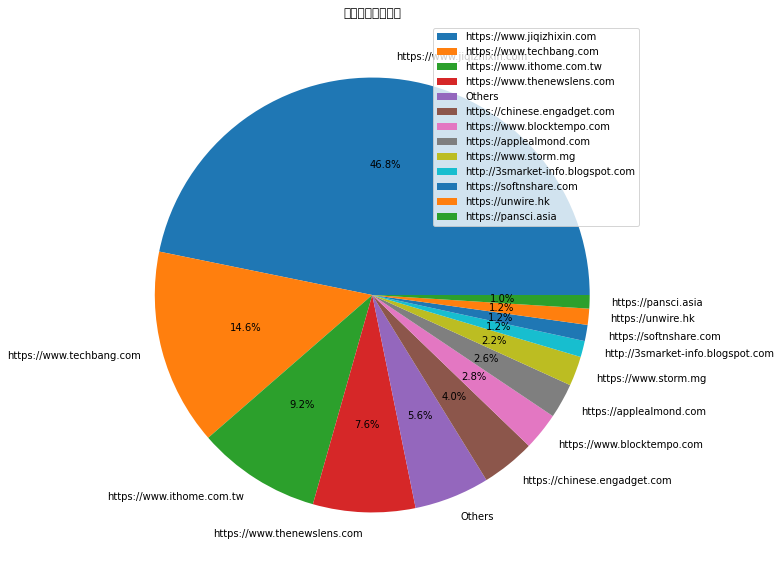

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(25,10))
plt.pie(new_origin_state['count'],
        labels=new_origin_state['new_origin'],
        autopct='%0.1f%%')

#plt.rcParams['font.sans-serif']=['FangSong']

plt.legend()
plt.title('新聞來源網站分布')
plt.show()

## 接著將新聞內容斷詞，根據關鍵詞繪製文字雲

In [36]:
import pandas as pd 

data = pd.read_csv('./news_contents.csv')
data.head()

,title,url,origin,content
0,想開咖啡廳，不是只要沖咖啡而已！專家曝8大開店地雷，經營美店絕對比你想的還要累-風傳媒,https://www.storm.mg/lifestyle/3689600?page=1,https://www.storm.mg,"[' 人氣 ', '現正熱映中', '熱門文章', '熱門分享', ' 許多人夢想開咖啡廳創..."
1,指揮中心公佈配戴口罩放寬規定，爬山、海邊活動可不用戴口罩 | T客邦,https://www.techbang.com/posts/90420-the-comma...,https://www.techbang.com,"[' janus 發表於 2021年10月03日 15 28 收藏此文 ', '指揮中心今天..."
2,中國東北限電限到只有 2G 訊號，紅綠燈罷工、行動支付不能用連買飯都困難 | T客邦,https://www.techbang.com/posts/90380-there-are...,https://www.techbang.com,"[' 鳯凰網 發表於 2021年10月03日 15 00 收藏此文 ', '中國東北多地傳出..."
3,NETSCOUT威脅情報報告：DDoS攻擊達540萬次較去年同期增11% | T客邦,https://www.techbang.com/posts/90274-netscout-...,https://www.techbang.com,"[' Hsuann 發表於 2021年10月03日 11 00 收藏此文 ', '友訊代理品..."
4,休旅車華麗變身「音樂戰車」，紐約街頭「惡名昭彰」的多明尼加汽車音響文化 - The News...,https://www.thenewslens.com/article/157149,https://www.thenewslens.com,"[' TNL編輯部國際編譯專用帳號 發表國際新聞的分析與整理 ', ' 這個文化源於對聲音和..."


In [37]:
news = list(data['content'].values)                                 
print(len(news), type(news))

500 <class 'list'>


In [41]:
pip install jieba


  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314481 sha256=2b833f25e8aa0045b41c6093da40f66c1f1639482d691ccb7cdc3b8ede87cf7d
  Stored in directory: c:\users\vincentlee1231995\appdata\local\pip\cache\wheels\ca\38\d8\dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba


In [38]:
import jieba
import jieba.analyse

# 移除停用詞
stopwords=[]

with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:             # 使用從網路上抓來的停用詞表
    for data in f.readlines():
        data = data.strip()
        stopwords.append(data)
        
len(stopwords)

746

## jieba 分詞
預設模式

In [39]:
# jieba 分詞
#預設模式

import jieba
import time

print('Jobs just begin!')

remained_news = []

startTime=time.time()

for n in news:
    
    seg = jieba.cut(n, cut_all=False) # 分詞後去除停用詞, 然後再重組回文章
   
    try:
        remained_news.append(''.join(list(filter(lambda a: a not in stopwords and a != '\n', seg))))
    
    except Exception as e:                         
        print(e)             # 若有 'nan' 的項目會引發錯誤  
        print(news.index(n))  # 取得序號再次確認新聞內容是否有問題

endTime=time.time()

print('Take time: ', endTime-startTime, 's')
print('Length of result:',len(remained_news))
print('All jobs Done!')

Jobs just begin!
Take time:  77.25787878036499 s
Length of result: 500
All jobs Done!


## 關鍵詞分析

In [40]:
# 關鍵字 tfidf-預設模式
keywords = []

startTime=time.time()

for n in remained_news:
    keywords.append(jieba.analyse.extract_tags(n, topK=20, withWeight=False))

#for j in keywords:
    #print(j,'\n')
    
    
endTime=time.time()

print('Take time: ', endTime-startTime, 's')
print('Length of result:',len(keywords))
print('All jobs Done!')

Take time:  34.198368549346924 s
Length of result: 500
All jobs Done!


In [41]:
# 把這 500 篇新聞內容做成文字雲

def plt_wordcloud(text): # 把文章內容轉文字雲
    
    from wordcloud import WordCloud
    import jieba
    import matplotlib.pyplot as plt
    from PIL import Image 
    import numpy as np
    %matplotlib inline
    
    #mask = np.array(Image.open(maskpath))
    
    wcloud = WordCloud(width=500, height=500, background_color='black', mask=None, 
                       min_font_size=8, font_path='C:/Windows/Fonts/kaiu.ttf').generate(text)
    
    plt.figure(figsize=(20, 10), facecolor=None)
    plt.imshow(wcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.show()

## 用斷詞過的新聞內容做文字雲

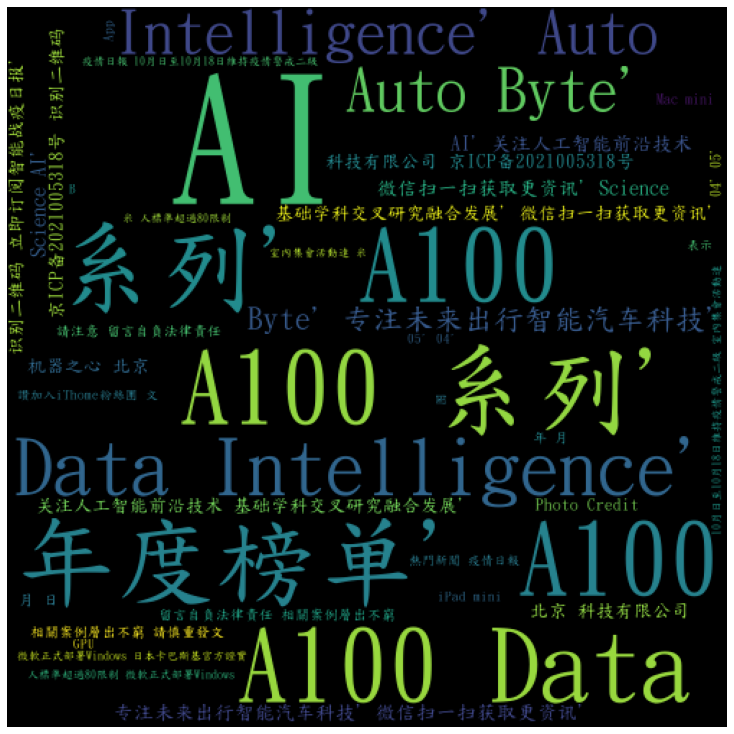

In [42]:
text = ''

for n in remained_news:  # 這500篇新聞的總和
    text += n
    
plt_wordcloud(text)

## 改用關鍵詞作文字雲

In [43]:
#keywords

keyword_text='' #要製作文字雲，來源文本不能是list形式

for lst in keywords:
    for item in lst:
        keyword_text+=' '+item
        
print(len(keyword_text))

36694


In [45]:
def wordCloud(text):   
    
    from wordcloud import WordCloud
    import jieba
    import matplotlib.pyplot as plt
    from PIL import Image 
    import numpy as np
    %matplotlib inline
    
    wcloud = WordCloud(width=500, height=500, background_color='black', mask=None, 
                       min_font_size=8, font_path='C:/Windows/Fonts/msjh.ttc').generate(text)
    
    plt.figure(figsize=(20, 10), facecolor=None)
    plt.imshow(wcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.show()

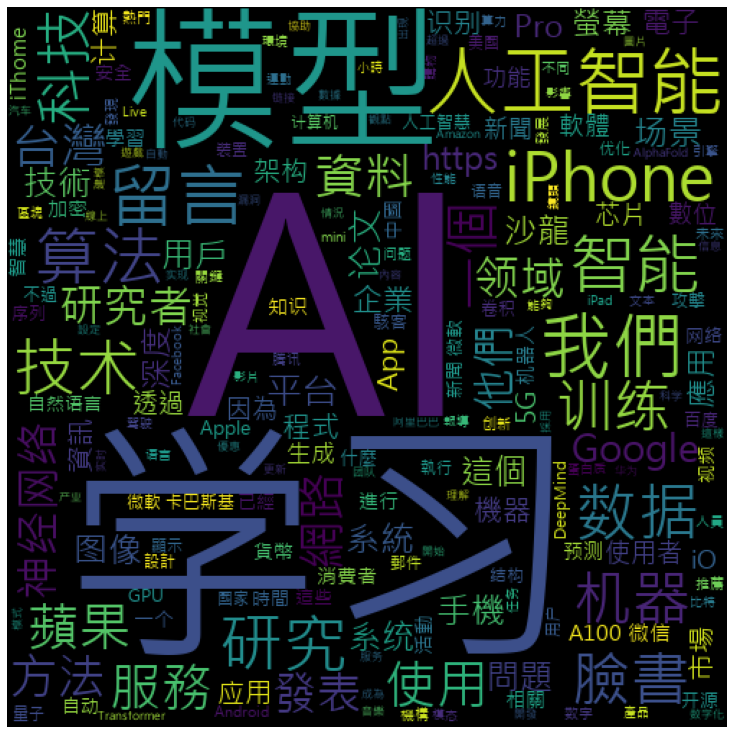

In [46]:
wordCloud(keyword_text)